
**Performance Scheduling**

Performance scheduling is a method used to allocate resources in a system to ensure optimal performance. This approach involves predicting the resource requirements and scheduling tasks in a way that maximizes efficiency and minimizes latency.

Let:

𝑇
𝑖
T
i
​
  be the execution time of task
𝑖
i
𝑅
𝑖
R
i
​
  be the required resources for task
𝑖
i
𝑆
𝑖
S
i
​
  be the start time of task
𝑖
i
𝐶
𝑖
C
i
​
  be the completion time of task
𝑖
i (
𝐶
𝑖
=
𝑆
𝑖
+
𝑇
𝑖
C
i
​
 =S
i
​
 +T
i
​
 )
𝑀
M be the total number of tasks
𝑅
𝑚
𝑎
𝑥
R
max
​
  be the total available resources
The optimization goal is to:

min
⁡
max
⁡
(
𝐶
𝑖
)
minmax(C
i
​
 )

Subject to:

∑
𝑖
=
1
𝑀
𝑅
𝑖
≤
𝑅
𝑚
𝑎
𝑥
∑
i=1
M
​
 R
i
​
 ≤R
max
​

𝑆
𝑖
≥
0
∀
𝑖
S
i
​
 ≥0∀i
𝐶
𝑖
=
𝑆
𝑖
+
𝑇
𝑖
∀
𝑖
C
i
​
 =S
i
​
 +T
i
​
 ∀i

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the model architecture
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

    for layer in range(100):
        model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))

    # Add the output layer with 10 neurons and softmax activation
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    return model

In [3]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Split the data into training and validation sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize the pixel values to the range [0, 1]
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Define the optimizer with legacy SGD and learning rate decay
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

# Compute the mean and standard deviation of the training set for normalization
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

# Normalize the datasets using the computed mean and std deviation
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [5]:

# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))

# Add the output layer with 10 neurons and softmax activation
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [10]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
n_epochs = 10
# Function to build and train the model
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 45s 20ms/step - loss: 1.9656 - accuracy: 0.2563 - val_loss: 1.8310 - val_accuracy: 0.2762 - lr: 0.0010
Epoch 2/10
1719/1719 [==============================] - 33s 19ms/step - loss: 1.4515 - accuracy: 0.3996 - val_loss: 1.1115 - val_accuracy: 0.5398 - lr: 0.0010
Epoch 3/10
1719/1719 [==============================] - 34s 19ms/step - loss: 1.1930 - accuracy: 0.4981 - val_loss: 1.0681 - val_accuracy: 0.5352 - lr: 0.0010
Epoch 4/10
1719/1719 [==============================] - 33s 19ms/step - loss: 1.2428 - accuracy: 0.4779 - val_loss: 1.0577 - val_accuracy: 0.5758 - lr: 0.0010
Epoch 5/10
1719/1719 [==============================] - 34s 20ms/step - loss: 1.0376 - accuracy: 0.5597 - val_loss: 0.8355 - val_accuracy: 0.6270 - lr: 0.0010
Epoch 6/10
1719/1719 [==============================] - 35s 21ms/step - loss: 1.0426 - accuracy: 0.5643 - val_loss: 0.9653 - val_accuracy: 0.6128 - lr: 0.0010
Epoch 7/10
1719/1719 [========================

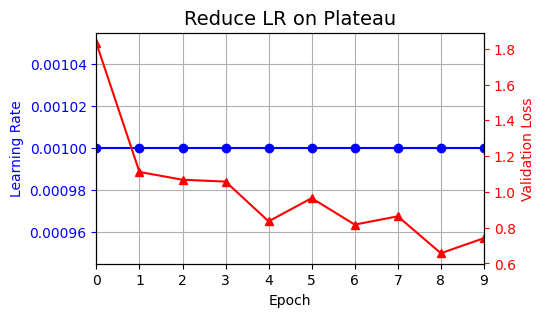

In [12]:
plt.figure(figsize=(5, 3))
# Plotting learning rate against epochs
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")  # Label for the x-axis
plt.ylabel("Learning Rate", color='b')  # Label for the left y-axis with blue color
plt.tick_params('y', colors='b')  # Color the ticks on the left y-axis blue
plt.gca().set_xlim(0, n_epochs - 1)  # Set x-axis limit from 0 to the number of epochs minus 1
plt.grid(True)  # Enable the grid for better readability

# Create a second y-axis for the same plot (sharing the same x-axis)
ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")  # Plotting validation loss against epochs
ax2.set_ylabel('Validation Loss', color='r')  # Label for the right y-axis with red color
ax2.tick_params('y', colors='r')  # Color the ticks on the right y-axis red

plt.title("Reduce LR on Plateau", fontsize=14)  # Title for the plot
plt.show()